# **Statistical Methods ANOVA, ANCOVA, MANCOVA and MANCOVA**

## **ANOVA**
> ANOVA is a Statistical technique for examining the difference among means for three or more populations.We can also say Analysis of varience is ANOVA, used to determined whether or not there is a statistically significant difference between  the means of three or more independent groups. The most common types of ANOVAs are the one way and two way ANOVA. 
> - 1. One way ANOVA:
> 
>                   Used to check how is the impact considering one factor. Desi Example: agr 2 plants ko fertilizer ko factor rakh k donun k fruit quality  ko dekhain to ya hoga one way ANOVA. Q k is me hm sirf ek fator ko consider kr rhy hain.

> 
> nechy flowchart as an example given hai.
```mermaid
    graph LR;
        C[Fertilizer] -->|ONE FACTOR|D[Fruit Quality]
       
```


>- 2. Two way ANOVA:
>
>                   Used to check how is the impact considering two factor. Same uper Waly example me hum agr unhi plants k height growth or sath me quality of fruits b consider krain to ya hojya ga two way ANOVA q k is me hm 2 fators ko as a consideration lay rhy hain. 
> > 
> nechy flowchart as an example given hai.
```mermaid
    graph LR;
        D[Fertilizer] -->|TWO FACTOR|C[Fruit Quality]
        E[Amount of water] -->|TWO FACTOR| C
```

In [70]:
# Python Example of Anova
# Reading the dataset
import pandas as pd
import numpy as np
TitanicSurvivalData=pd.read_csv('TitanicSurvivalData.csv', encoding='latin')
print('Shape before deleting duplicate values:', TitanicSurvivalData.shape)

# Removing duplicate rows if any
TitanicSurvivalData=TitanicSurvivalData.drop_duplicates()
print('Shape After deleting duplicate values:', TitanicSurvivalData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
TitanicSurvivalData.head(10)

Shape before deleting duplicate values: (891, 12)
Shape After deleting duplicate values: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<AxesSubplot:xlabel='Survived'>

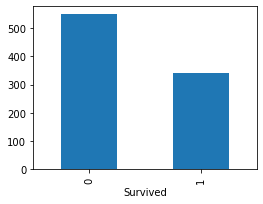

In [71]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=TitanicSurvivalData.groupby('Survived').size()
GroupedData.plot(kind='bar', figsize=(4,3))


In [72]:
# Looking at sample rows in the data
TitanicSurvivalData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
TitanicSurvivalData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [74]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
TitanicSurvivalData.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## Basic Data Exploration Results
Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regaring each column. Hence, creating a initial roadmap for further analysis.

The selected columns in this step are not final, further study will be done and then a final list will be created

- PassengerId: Qualitative. Rejected.
- Survived: Categorical. Selected. This is the Target Variable!
- Pclass: Categorical. Selected.
- Name: Qualitative. Rejected. Your name does not save you from dying!!
- Sex: Categorical. Selected.
- Age: Continuous. Selected.
- SibSp: Categorical. Selected.
- Parch: Categorical. Selected.
- Ticket: Qualitative. Rejected.
- Fare: Continuous. Selected.
- Cabin: Qualitative. Rejected. Also, this has too many missing values!
- Embarked: Categorical. Selected.

In [75]:
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
UselessColumns = ['PassengerId','Name','Ticket','Cabin']
TitanicSurvivalData = TitanicSurvivalData.drop(UselessColumns,axis=1)
TitanicSurvivalData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [76]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

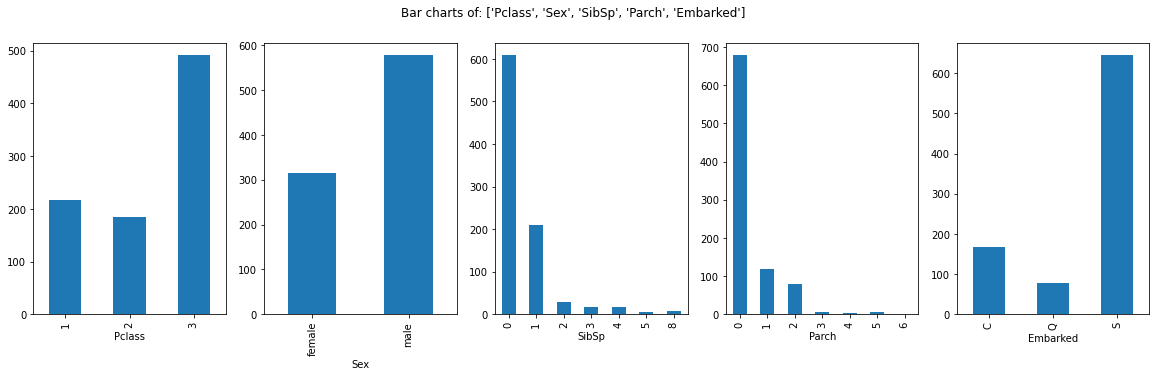

In [77]:
# Calling the function
PlotBarCharts(inpData=TitanicSurvivalData, colsToPlot=['Pclass', 'Sex', 'SibSp','Parch','Embarked'])

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

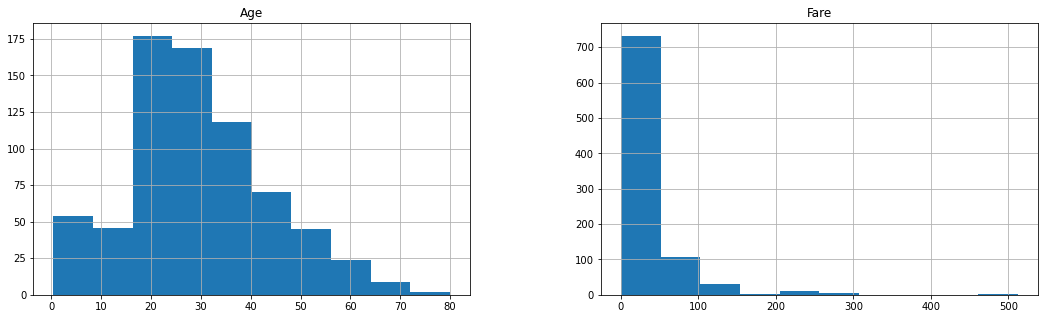

In [78]:
# Plotting histograms of multiple columns together
# Observe that ApplicantIncome and CoapplicantIncome has outliers
TitanicSurvivalData.hist(['Age', 'Fare'], figsize=(18,5))

In [79]:
# Finding how many missing values are there for each column
TitanicSurvivalData.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [80]:
# Replacing missing values of Age with median value
TitanicSurvivalData['Age'].fillna(TitanicSurvivalData['Age'].median(), inplace=True)

# Replacing missing values of Embarked with Mode value
TitanicSurvivalData['Embarked'].fillna(TitanicSurvivalData['Embarked'].mode()[0], inplace=True)

In [81]:
# Checking missing values again after the treatment
df=TitanicSurvivalData.isnull().sum()
df

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [82]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(TitanicSurvivalData['Age'],TitanicSurvivalData['Fare'])
print("F value is : ",fvalue)
print("P value is :", pvalue)


F value is :  2.728261147598911
P value is : 0.09876295124019947


In [83]:
if pvalue< 0.05 :
    print("these are corelated")
else:
    print("Not corellated")

Not corellated


In [84]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

In [85]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['Age','Fare']
FunctionAnova(inpData=TitanicSurvivalData, TargetVariable='Survived', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

Age is NOT correlated with Survived | P-Value: 0.052760688475835
Fare is correlated with Survived | P-Value: 6.120189341921873e-15


In [86]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['Pclass','Age']
FunctionAnova(inpData=TitanicSurvivalData, TargetVariable='Survived', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

Pclass is correlated with Survived | P-Value: 2.5370473879805644e-25
Age is NOT correlated with Survived | P-Value: 0.052760688475835


In [87]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['Pclass','Fare']
FunctionAnova(inpData=TitanicSurvivalData, TargetVariable='Survived', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

Pclass is correlated with Survived | P-Value: 2.5370473879805644e-25
Fare is correlated with Survived | P-Value: 6.120189341921873e-15


In [88]:
#pip install pingouin

## **ANCOVA**
> In short analysis of covariance is also used to determine whether or not there is a statistically significant differnce between the means of three or more independent groups/samples. The Difference is an ANCOVA includes one or more covariates, which help us to better understand how a factor impacts a response variable after accounting for some covariates.
> > 
> nechy flowchart as an example given hai.
```mermaid
    graph LR;
        D[Stuyding Technique] -->|ONE FACTOR|C[Exam Score]
        E[Current Grade] -->|Covariates| C
```


In [89]:

import numpy as np
import pandas as pd
 
# create data
data = pd.DataFrame({'methodology': np.repeat(['A', 'B', 'C'], 4),
                     'current_grade': [67, 88, 75, 85,
                                       92, 77, 74, 88,
                                       91, 88, 82, 80],
                     'test_score': [77, 89, 74, 69,
                                    88, 93, 94, 90,
                                    85, 81, 83, 79]})
# view data
data

,methodology,current_grade,test_score
0,A,67,77
1,A,88,89
2,A,75,74
3,A,85,69
4,B,92,88
5,B,77,93
6,B,74,94
7,B,88,90
8,C,91,85
9,C,88,81


In [90]:

from pingouin import ancova

In [91]:

from pingouin import ancova
 
data = pd.DataFrame({'methodology': np.repeat(['A', 'B', 'C'], 4),
                     'current_grade': [67, 88, 75, 85,
                                       92, 77, 74, 88,
                                       91, 88, 82, 80],
                     'test_score': [77, 89, 74, 69,
                                    88, 93, 94, 90,
                                    85, 81, 83, 79]})
 
ancova(data=data, dv='test_score', covar='current_grade', between='methodology')

,Source,SS,DF,F,p-unc,np2
0,methodology,387.510992,2,6.005703,0.025542,0.600228
1,current_grade,1.404669,1,0.043540,0.839927,0.005413
2,Residual,258.095331,8,NaN,NaN,NaN


In [92]:
ancova(data=TitanicSurvivalData, dv='Survived', covar='Parch', between='Sex')

,Source,SS,DF,F,p-unc,np2
0,Sex,61.409716,1,368.674007,5.410557e-69,0.293373
1,Parch,0.600703,1,3.606325,5.788405e-02,0.004045
2,Residual,147.913405,888,NaN,NaN,NaN


## **MANOVA**
> Inshort hm isy Multivariate analysis of variance b keh skty hain, ya ANOVA k identical hota hai magr i amw two y more responses ko dekhty hain one factor two response. Ya b one way and two way hota hai same ANOVA k trah.
> - 1. One way MANOVA:
>
>                   Used to check how is the impact considering one factor and two response of variable. Desi Example: agr 2 plants ko fertilizer ko factor rakh k donun k fruit quality or height ko dekhain to ya hoga one way ANOVA. Q k is me hm sirf ek fator ko consider kr rhy hain.
> > 
> nechy flowchart as an example given hai.
```mermaid
    graph LR;
        A[Fertilizer] -->|ONE FACTOR|B[Fruit Quality]
        A --> |ONE FACTOR|C[Plant Height]
```
> -2. Two way MANOVA:
> 
>                   Is me two factor and two response of variables ko dekahin gay, like agr 2 plants ko fertilizer and water quantity ko factor rakh k donun k fruit quality or height ko dekhain to ya hoga one way ANOVA. Q k is me hm sirf ek fator ko consider kr rhy hain. 
> 
> nechy flowchart as an example given hai.
```mermaid
    graph LR;
        A[Fertilizer] -->|TWO FACTOR|B[Fruit Quality]
        A --> |TWO FACTOR|C[Plant Height]
        D[Amount of water] -->|TWO FACTOR| B
        D --> |TWO FACTOR|C
```

In [93]:
#Importing MANOVA
from statsmodels.multivariate.manova import MANOVA

In [94]:
df = TitanicSurvivalData
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [95]:
maov = MANOVA.from_formula('Fare + Age  ~ Survived', data=df)

In [96]:
print(maov.mv_test())

                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept        Value  Num DF  Den DF   F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.2316 2.0000 888.0000 1472.9436 0.0000
         Pillai's trace 0.7684 2.0000 888.0000 1472.9436 0.0000
 Hotelling-Lawley trace 3.3174 2.0000 888.0000 1472.9436 0.0000
    Roy's greatest root 3.3174 2.0000 888.0000 1472.9436 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
          Survived        Value  Num DF  Den DF  F Value Pr > F
---------------------------------------------------------------
            Wilks' lambda 0.9257 2.0000 888.0000 35.6602 0.0000
           Pillai's trace 0.0743 2.0000 888.0000 35.6602 0.

## **MANCOVA**
> Is also known as Multivariate Analysis of covariance. is identical to a MANOVA, except it also includes one or more covariates. Similar to a MANOVA, a MANCOVA can also be one-way or two-way.
> - 1. One way MANCOVA:
>
>                       Is me one factor with covariance and two response of variables ko dekahin gay, like agr 2 plants ko fertilizer  ko factor weather ko as a covarient rakh k donun k fruit quality or height ko dekhain to ya hoga one way MANCOVA. Q k is me hm sirf ek factor ko consider kr rhy hain. 
> > > 
> nechy flowchart as an example given hai.
```mermaid
    graph LR;
        A[Fertilizer] -->|ONE FACTOR|B[Fruit Quality]
        A --> |ONE FACTOR|C[Plant Height]
        D[Weather] -->|Covariates| B
        D -->|Covariates| C
```
> - 1. Two way MANCOVA:
>
>                       Is me two factor with covariance and two response of variables ko dekahin gay, like agr 2 plants ko fertilizer and water quantity ko factor rakh k donun k fruit quality or height ko dekhain to ya hoga one way ANOVA. Q k is me hm sirf ek fator ko consider kr rhy hain. 
> > > 
> nechy flowchart as an example given hai.
```mermaid
    graph LR;
        A[Fertilizer] -->|TWO FACTOR|B[Fruit Quality]
        A --> |TWO FACTOR|C[Plant Height]
        D[Amount of water] -->|TWO FACTOR|B
        D --> |TWO FACTOR|C
         E[Weather] -->|Covariates| B
        E -->|Covariates| C
```

# **Mancova Python example nahi mila Ammar bhai** 

## **Varianve**
> Is me hm dekhty hain k hmari jo random variable hai wo target variable sy kitna mukhtalif hai. 
> Incosistency in prediction ya kitna dispersion hai. 

> Ya hm ya b kehskty hain k hmari predicted value jo hai wo mean of the data set sy kitni door hai. 
> 

In [97]:
def variance(data):
   # Number of observations
     n = len(data)
  # Mean of the data
     mean = sum(data) / n
 # Square deviations
     deviations = [(x - mean) ** 2 for x in data]
# Variance
     variance = sum(deviations) / n
     return variance

In [98]:
data=[4, 8, 6, 5, 3, 2, 8, 9, 2, 5]
vr=variance(data)
vr

5.76

# Standard Deviation
> Agr hm variance k square root lain to Standard deviation mil jaya ga 
> Is me hm ek set of numeric values k variation ya dispersion ko measure krty hain. 

In [99]:
import math
def stdev(data):
     var = variance(data)
     std_dev = math.sqrt(var)
     return std_dev

In [100]:
stdev(data)

2.4

In [101]:
std=math.sqrt(vr)
std

2.4

# Standard Error Mean
> Is me hm ya dekhty hain k jo sample k mean hai wo population k mean sy kitna door hai. Jab k STD me dataset k dispersion ko measure krty hain k wo us k mean sy kitni door hai.

> Is ko simply agr hm STD ko square root of number of samples sy devide krain to SEM ajata hai.

In [102]:
from scipy.stats import sem

In [103]:
sem(data)

0.7999999999999999

# Confidence Interval
> Ya wo range hai jis k hmy yaqeen hota hai ya hm expect kr rhy hoty hain agr hm apy experiment ko dubara krain same tariqay sy to usi k range me aya ga. 

> agr hm kety hain k me ny a gym me different instruments k sath 20 sets lgaya hain agr me kal b same protein drink lay k jaun jo aj lay k gaya tha to 10 ya 20 sets laga sakun ga. 

## Alpha 0.05
> YA wo value hai jisy hm as a threshold use krty hain k agr hmry koi b value k difference is sy kam aya to wo acceptable hai wrna nai. ya hm isy as a requirment rakh skty hain. 

> Jesy k Islam me Alcohol ko ek percentage tak hi hala kea gya hua hai as a medicine age medicne me Alcohol ho to us sy ziad ho to wo acceptable ni hoga. 

# **Univariate Analysis**
Univariate Analysis me sirf ek hi variable ko Analyse krty hain. 

> Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn't deal with causes or relationships (unlike regression ) and it's major purpose is to describe; It takes data, summarizes that data and finds patterns in the data

>There are three common ways to perform univariate analysis on one variable:

1. Summary statistics – Measures the center and spread of values.

2. Frequency table – Describes how often different values occur.

3. Charts – Used to visualize the distribution of values.

In [104]:
import pandas as pd

#create DataFrame
df = pd.DataFrame({'points': [1, 1, 2, 3.5, 4, 4, 4, 5, 5, 6.5, 7, 7.4, 8, 13, 14.2],
                   'assists': [5, 7, 7, 9, 12, 9, 9, 4, 6, 8, 8, 9, 3, 2, 6],
                   'rebounds': [11, 8, 10, 6, 6, 5, 9, 12, 6, 6, 7, 8, 7, 9, 15]})

#view first five rows of DataFrame
df.head()

,points,assists,rebounds
0,1.0,5,11
1,1.0,7,8
2,2.0,7,10
3,3.5,9,6
4,4.0,12,6


### 1. Calculate Summary Statistics

In [105]:
#calculate mean of 'points'
df['points'].mean()


5.706666666666667

In [106]:
#calculate median of 'points' 
df['points'].median() 


5.0

In [107]:
#calculate standard deviation of 'points'
df['points'].std() 

3.858287308169384

### 2. Create Frequency Table

In [108]:
#create frequency table for 'points'
df['points'].value_counts()

4.0     3
1.0     2
5.0     2
2.0     1
3.5     1
6.5     1
7.0     1
7.4     1
8.0     1
13.0    1
14.2    1
Name: points, dtype: int64

### 3. Create Charts

<AxesSubplot:>

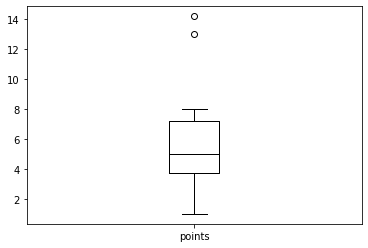

In [109]:
import matplotlib.pyplot as plt

df.boxplot(column=['points'], grid=False, color='black')

# Multivariate Analysis
>Multivariate analysis deals with the statistical analysis of data collected on more than one dependent variable.

In [110]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
data=pd.read_csv("Wine.csv")
# We name the colums as V with the index of 1 to 14 
data.columns = ["V"+str(i) for i in range(1, len(data.columns)+1)]
 # independent variables data from v2 to v14 it is an independent variables
X = data.loc[:, "V2":]
# dependednt variable data in v1 there are 1,2,3 dependent variables it shows that the value of y is 3 variables
y = data.V1 
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [112]:
# First five rows with columns
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [113]:
# Last five rows with columns
data.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
176,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [114]:
# Information of the dat 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      177 non-null    int64  
 1   V2      177 non-null    float64
 2   V3      177 non-null    float64
 3   V4      177 non-null    float64
 4   V5      177 non-null    float64
 5   V6      177 non-null    int64  
 6   V7      177 non-null    float64
 7   V8      177 non-null    float64
 8   V9      177 non-null    float64
 9   V10     177 non-null    float64
 10  V11     177 non-null    float64
 11  V12     177 non-null    float64
 12  V13     177 non-null    float64
 13  V14     177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


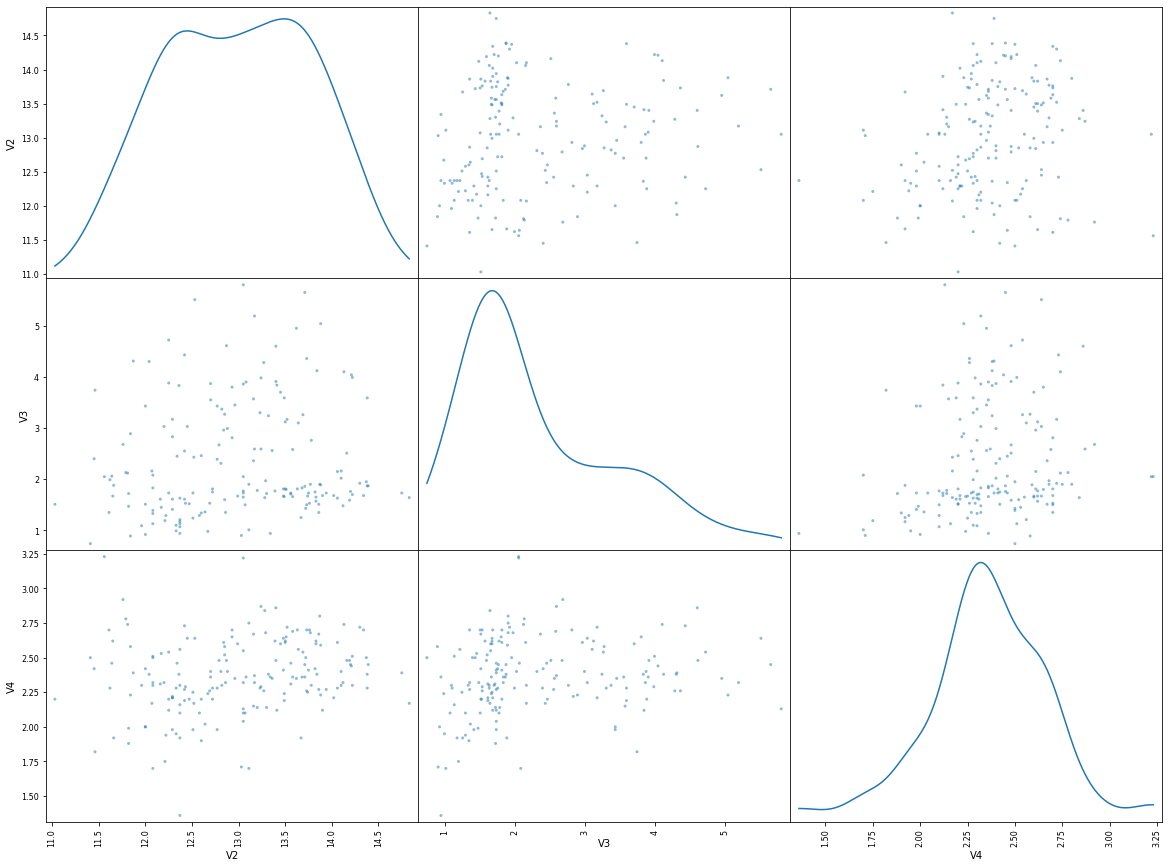

In [115]:
# Here is the plots of multivataie data for three coloumns 
pd.plotting.scatter_matrix(data.loc[:, "V2":"V4"], diagonal="kde",figsize=(20,15))
plt.show()

C:\Users\Sartaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sartaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sartaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


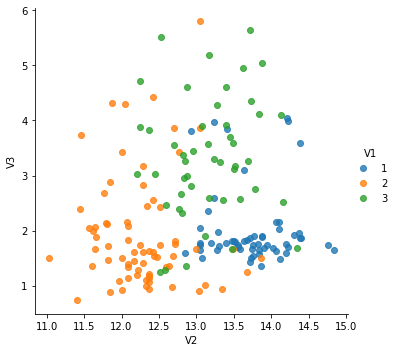

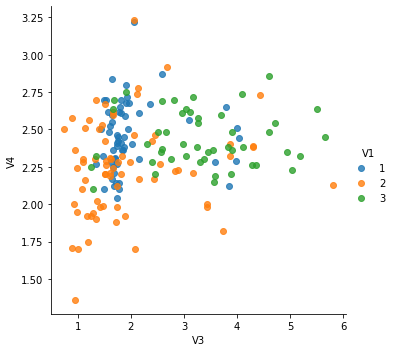

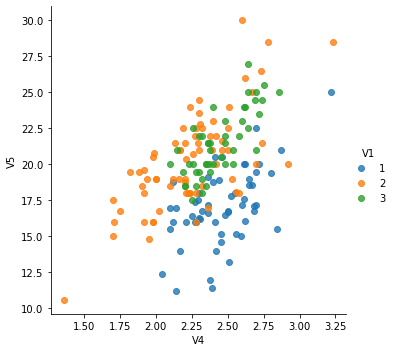

In [116]:
# Scatte plot with the dependent variables 
for i in range(2,5):
    sns.lmplot("V"+str(i), "V"+str(i+1), data, hue="V1", fit_reg=False);